In [8]:
import yfinance as yf
import pandas as pd

In [9]:
# Download the FTSE 100 data from Yahoo Finance
df = yf.download("^FTSE", start="2022-01-01", end="2024-07-07")
df.to_csv("./Data/FTSE100.csv")

[*********************100%%**********************]  1 of 1 completed


In [10]:
df = yf.download("RR.L", start="2022-01-01", end="2024-07-07")
df.to_csv("./Data/RollsRoyce.csv")

[*********************100%%**********************]  1 of 1 completed

# Get TCFD Score from Report of Companies, using ChatGPT to extract the score

In [16]:
import pdfplumber
import glob

# Find all PDF files in the Data folder recursively
pdf_files = glob.glob('./Data/*.pdf', recursive=True)

# Open the PDF file
for pdf_file in pdf_files:
    with pdfplumber.open(pdf_file) as pdf:
        # Extract text from each page
        text = ''
        for page in pdf.pages:
            text += page.extract_text()
        # Print the extracted text (for verification)
        print(text)
        # Save the extracted text to a text file
        with open(pdf_file.replace('.pdf', '.txt'), encoding='utf-8', mode='w') as f:
            f.write(text)


Task Force on Climate-related
Financial Disclosures Report
PwC US 2023
1Contents
Intro letter from leadership 3
About this report 4
Overview of the Task Force on Climate-related Financial Disclosures (TCFD) 4
Report scope and methodology 5
Governance at PwC 7
Governance of climate strategy 7
Strategy 9
How we are addressing climate change 9
How we are reducing our emissions footprint 10
TCFD assessment process 11
An overview of our findings 15
Risk management 20
Metrics and targets 22
Calculations 25
Our GHG footprint 25
Looking ahead 26
Appendix 27
Detailed TCFD categorization of risk and opportunity analysis 27
Detailed physical risk scenario analysis results 33
Detailed transition risk scenario analysis results 35
2Introduction
PwC’s purpose is to build trust in society and solve Our FY22 Purpose and Inclusion Report highlights
important problems. As such, we feel an obligation and how we are addressing climate footprint as a core
responsibility to address the root causes of climate

In [12]:
# Load stock data
import pandas as pd
df = pd.read_csv("./Data/RollsRoyce.csv", index_col='Date', parse_dates=True)

C:\Users\yijia\AppData\Local\Temp\ipykernel_101656\3750807860.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Close'][i] > df['Close'][i - window_size:i].mean() * 1.1:
C:\Users\yijia\AppData\Local\Temp\ipykernel_101656\3750807860.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Close'][i] < df['Close'][i - window_size:i].mean() * 0.9:
C:\Users\yijia\AppData\Local\Temp\ipykernel_101656\3750807860.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a 

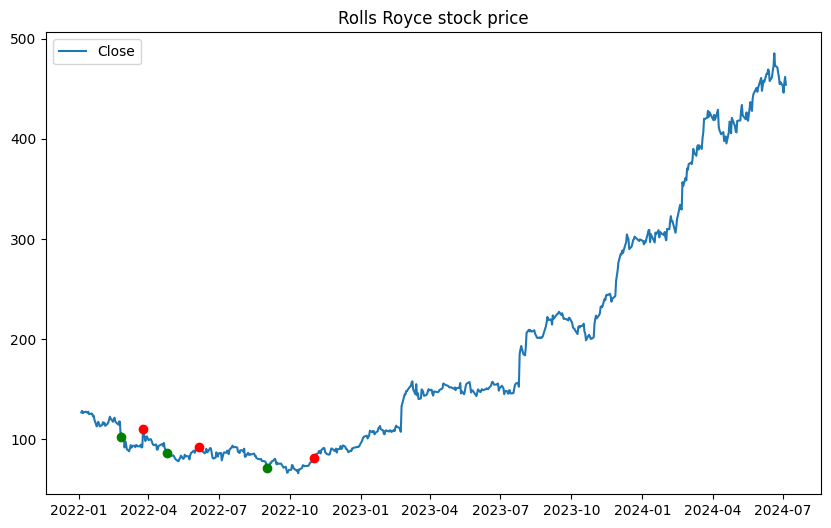

[Timestamp('2022-02-24 00:00:00'),
 Timestamp('2022-03-25 00:00:00'),
 Timestamp('2022-04-25 00:00:00'),
 Timestamp('2022-06-06 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00')]

In [13]:
import matplotlib.pyplot as plt
# Plot the stock price
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close')
# Identify trend changes, plot red dots for peaks and green dots for troughs
trend = new_trend = None
# Fixed window size for the moving average
window_size = 20
change_dates = []
# if the price is above the moving average by 20% or more, it is an uptrend
for i in range(window_size, len(df) - window_size):
    if df['Close'][i] > df['Close'][i - window_size:i].mean() * 1.1:
        new_trend = 'up'
    elif df['Close'][i] < df['Close'][i - window_size:i].mean() * 0.9:
        new_trend = 'down'
    if new_trend != trend:
        change_dates.append(df.index[i])
        plt.plot(df.index[i], df['Close'][i], 'ro' if new_trend == 'up' else 'go')
        trend = new_trend
plt.title('Rolls Royce stock price')
plt.legend()
plt.show()
change_dates



Y fisrt and last date:  2022-01-05 00:00:00 2024-07-05 00:00:00
X fisrt and last date:  2022-01-05 00:00:00 2024-07-05 00:00:00
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           8.91e-36
Time:                        15:57:22   Log-Likelihood:                 1424.4
No. Observations:                 630   AIC:                            -2845.
Df Residuals:                     628   BIC:                            -2836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

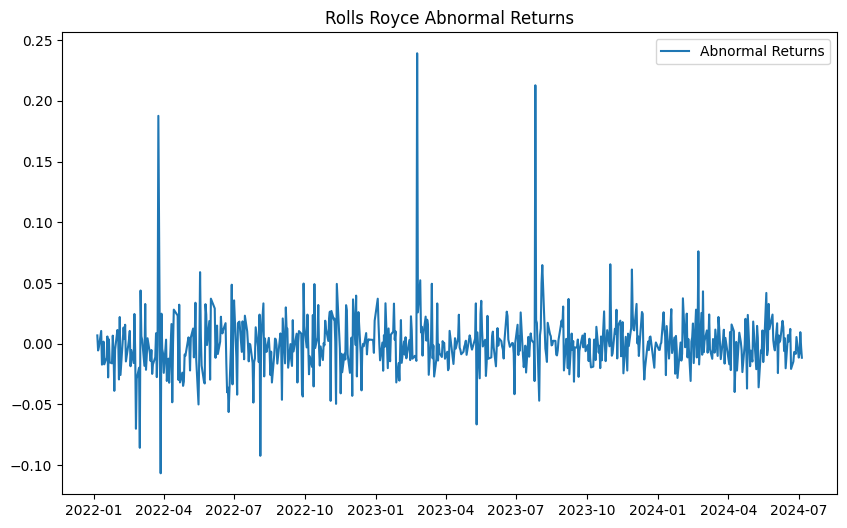

In [14]:
# Perform a linear regression to find the relationship between the FTSE 100 and Rolls Royce stock
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Load FTSE 100 data
df_ftse = pd.read_csv("./Data/FTSE100.csv", index_col='Date', parse_dates=True)
df = pd.read_csv("./Data/RollsRoyce.csv", index_col='Date', parse_dates=True)

assert df.index[0] == df_ftse.index[0], 'The start date of the two datasets should be the same'
if len(df) > len(df_ftse):
    df = df.loc[:df_ftse.index[-1]]
elif len(df) < len(df_ftse):
    df_ftse = df_ftse.loc[:df.index[-1]]

stock_return = df['Close'].pct_change().dropna()
ftse_return = df_ftse['Close'].pct_change().dropna()
X = ftse_return
Y = stock_return

# Perform join on the two dataframes
print("Y fisrt and last date: ", Y.index[0], Y.index[-1])
print("X fisrt and last date: ", X.index[0], X.index[-1])
X = ftse_return.tolist()
Y = stock_return.tolist()
assert len(X) == len(Y), 'The length of X and Y should be the same '+ str(len(X))+' '+str(len(Y))

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary())  

# Step 4: Calculate Abnormal Returns
stock_returns_predicted = model.predict(X)
abnormal_returns = stock_return[:len(stock_returns_predicted)] - stock_returns_predicted

# Plot the abnormal returns
plt.figure(figsize=(10, 6))
plt.plot(abnormal_returns, label='Abnormal Returns')
plt.title('Rolls Royce Abnormal Returns')
plt.legend()
plt.show()
